# DQN with two improvements

In [1]:
from helpers.advanced_map import AdvancedMap

from IPython.display import display
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from helpers.r_matrix import r_matrix
from helpers.get_available_actions import get_available_actions
import numpy as np

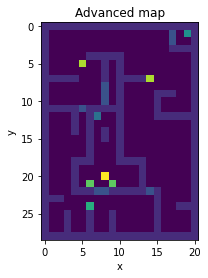

In [2]:
m = AdvancedMap()
m.displayImg()

In [ ]:
# using https://networkx.org/documentation/stable/tutorial.html
# initialise the graph
G = nx.Graph()

# Get the R Matrix to tell which states connect to other states
r = r_matrix(m.map)

# check whether the state has access to anythere and if it does then add it. Otherwise don't (this cuts down on the number of nodes)
ns = [y for y, row in enumerate(r) if len(get_available_actions(r, y)) > 0]
G.add_nodes_from(ns)

# start iterating through the R matrix to get the connections
for y, row in enumerate(r):
    for x, cellweight in enumerate(row):
        # if the cell isn't null add the edge and the weight
        if not np.isnan(cellweight):
            G.add_edge(y, x, weight=cellweight)

# draw the graph
nx.draw(G, with_labels=True)

# Remove the variables
del r
del G